In [29]:
 # TODO: Credit to original code source

In [30]:
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [31]:
audioDirectory = "audio/"
chartDirectory = "charts/"
filename = "ASCrocodileSaturatorCrewCut"  # TODO: array of files
audioFileExtension = ".wav"
imageFileExtension = ".png"

### Loading audio files with Librosa


In [32]:
audioFile = audioDirectory + filename + audioFileExtension

In [33]:
ipd.Audio(audioFile)

In [34]:
# load audio files with librosa
scale, sr = librosa.load(audioFile)

### Mel filter banks

In [35]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)

In [36]:
filter_banks.shape

(10, 1025)

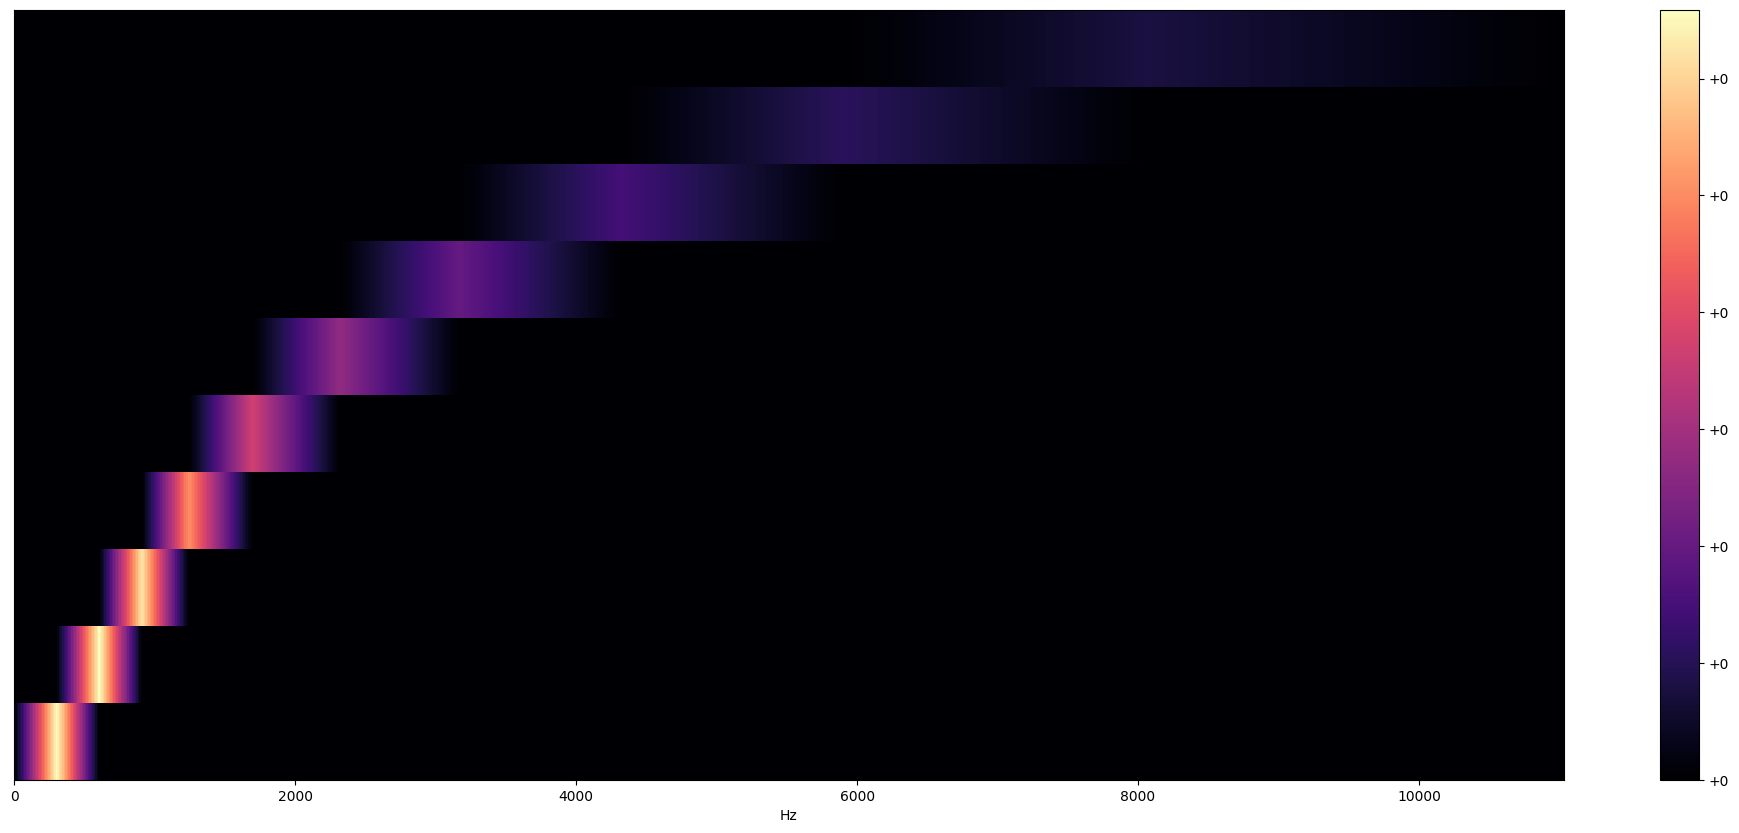

In [37]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks, 
                         sr=sr, 
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

### Extracting Mel Spectrogram

In [38]:
mel_spectrogram = librosa.feature.melspectrogram(y=scale, sr=sr, n_fft=2048, hop_length=512, n_mels=10)

In [39]:
mel_spectrogram.shape

(10, 776)

In [40]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

In [41]:
log_mel_spectrogram.shape

(10, 776)

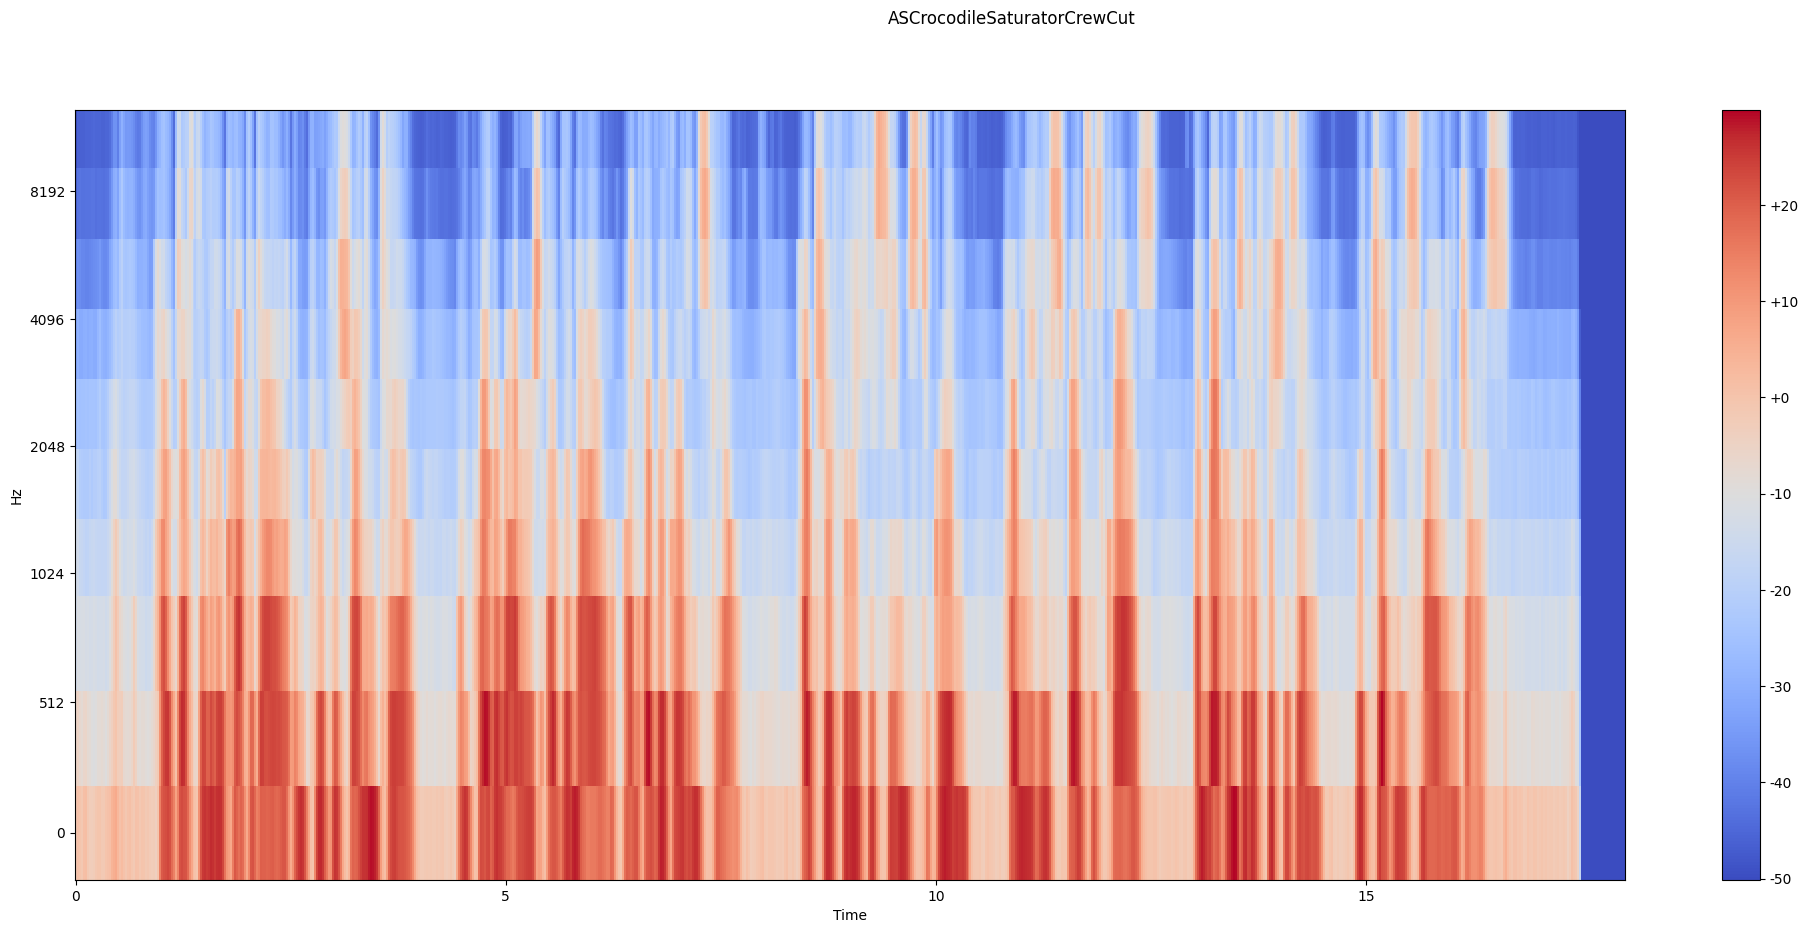

In [42]:
figure = plt.figure(figsize=(25, 10))
figure.suptitle(filename)
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.colorbar(format="%+2.f")

#  Save the chart as a png (this must be done before calling .show() or only a blank image will be saved)
plt.savefig(chartDirectory + filename + imageFileExtension)

# Show the chart
plt.show()